In [41]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [42]:
cloud_config= {'secure_connect_bundle': r'C:\Users\biswa\OneDrive\pred_main\cassandra\secure-connect-jet-engine-rul.zip'}
auth_provider = PlainTextAuthProvider(CASSANDRA_ID, CASSANDRA_KEY)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

In [43]:
session = cluster.connect('machine_learning')
session.execute("USE machine_learning;")

In [44]:
col = ["engine", "cycles", "os1", "os2", "os3", "sm1", "sm2", "sm3", "sm4", "sm5", "sm6", "sm7", "sm8", "sm9",
       "sm10", "sm11", "sm12", "sm13", "sm14", "sm15", "sm16", "sm17", "sm18", "sm19", "sm20", "sm21" ]

train1 = pd.DataFrame(session.execute("SELECT * FROM train1fd;")).set_index("slno").sort_index()
train1 = train1.reindex(columns = col)

In [45]:
test1 = pd.DataFrame(session.execute("SELECT * FROM test1fd;")).set_index("slno").sort_index()
test1 = test1.reindex(columns = col)

In [46]:
rul1 = pd.DataFrame(session.execute("SELECT * FROM rul1fd;")).set_index("slno").sort_index()

In [47]:
print(train1.shape)
print(test1.shape)
print(rul1.shape)

(20631, 26)
(13096, 26)
(100, 1)


In [48]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  20631 non-null  int64  
 1   cycles  20631 non-null  int64  
 2   os1     20631 non-null  float64
 3   os2     20631 non-null  float64
 4   os3     20631 non-null  int64  
 5   sm1     20631 non-null  float64
 6   sm2     20631 non-null  float64
 7   sm3     20631 non-null  float64
 8   sm4     20631 non-null  float64
 9   sm5     20631 non-null  float64
 10  sm6     20631 non-null  float64
 11  sm7     20631 non-null  float64
 12  sm8     20631 non-null  float64
 13  sm9     20631 non-null  float64
 14  sm10    20631 non-null  float64
 15  sm11    20631 non-null  float64
 16  sm12    20631 non-null  float64
 17  sm13    20631 non-null  float64
 18  sm14    20631 non-null  float64
 19  sm15    20631 non-null  float64
 20  sm16    20631 non-null  float64
 21  sm17    20631 non-null  int64  
 22

In [49]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  13096 non-null  int64  
 1   cycles  13096 non-null  int64  
 2   os1     13096 non-null  float64
 3   os2     13096 non-null  float64
 4   os3     13096 non-null  int64  
 5   sm1     13096 non-null  float64
 6   sm2     13096 non-null  float64
 7   sm3     13096 non-null  float64
 8   sm4     13096 non-null  float64
 9   sm5     13096 non-null  float64
 10  sm6     13096 non-null  float64
 11  sm7     13096 non-null  float64
 12  sm8     13096 non-null  float64
 13  sm9     13096 non-null  float64
 14  sm10    13096 non-null  float64
 15  sm11    13096 non-null  float64
 16  sm12    13096 non-null  float64
 17  sm13    13096 non-null  float64
 18  sm14    13096 non-null  float64
 19  sm15    13096 non-null  float64
 20  sm16    13096 non-null  float64
 21  sm17    13096 non-null  float64
 22

In [50]:
rul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rul     100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [51]:
train1.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,29.227633,1.000000,26.000000,52.000000,77.000000,100.000000
cycles,20631.0,108.807862,68.880990,1.000000,52.000000,104.000000,156.000000,362.000000
os1,20631.0,-0.000009,0.002187,-0.008700,-0.001500,0.000000,0.001500,0.008700
os2,20631.0,0.000002,0.000293,-0.000600,-0.000200,0.000000,0.000300,0.000600
os3,20631.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
sm1,20631.0,518.669983,0.000000,518.669983,518.669983,518.669983,518.669983,518.669983
sm2,20631.0,642.680934,0.500053,641.210022,642.325012,642.640015,643.000000,644.530029
sm3,20631.0,1590.523119,6.131150,1571.040039,1586.260010,1590.099976,1594.380005,1616.910034
sm4,20631.0,1408.933782,9.000605,1382.250000,1402.359985,1408.040039,1414.555054,1441.489990
sm5,20631.0,14.620000,0.000000,14.620000,14.620000,14.620000,14.620000,14.620000


In [52]:
test1.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,13096.0,51.543907,28.289423,1.000000,28.000000,52.000000,76.000000,100.000000
cycles,13096.0,76.836515,53.057749,1.000000,33.000000,69.000000,113.000000,303.000000
os1,13096.0,-0.000011,0.002203,-0.008200,-0.001500,0.000000,0.001500,0.007800
os2,13096.0,0.000004,0.000294,-0.000600,-0.000200,0.000000,0.000300,0.000700
os3,13096.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
sm1,13096.0,518.669983,0.000000,518.669983,518.669983,518.669983,518.669983,518.669983
sm2,13096.0,642.475088,0.400899,641.130005,642.197510,642.460022,642.739990,644.299988
sm3,13096.0,1588.099204,5.003274,1569.040039,1584.599976,1587.989990,1591.362488,1607.550049
sm4,13096.0,1404.735362,6.688309,1384.390015,1399.949951,1404.439941,1409.050049,1433.359985
sm5,13096.0,14.620000,0.000000,14.620000,14.620000,14.620000,14.620000,14.620000


In [53]:
rul1.describe().T

,count,mean,std,min,25%,50%,75%,max
rul,100.0,75.52,41.76497,7.0,32.75,86.0,112.25,145.0


In [54]:
train1

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0,1,1,-0.0007,-0.0004,100,518.669983,641.820007,1589.699951,1400.599976,14.62,...,521.659973,2388.020020,8138.620117,8.4195,0.03,392,2388,100,39.060001,23.419001
1,1,2,0.0019,-0.0003,100,518.669983,642.150024,1591.819946,1403.140015,14.62,...,522.280029,2388.070068,8131.490234,8.4318,0.03,392,2388,100,39.000000,23.423599
2,1,3,-0.0043,0.0003,100,518.669983,642.349976,1587.989990,1404.199951,14.62,...,522.419983,2388.030029,8133.229980,8.4178,0.03,390,2388,100,38.950001,23.344200
3,1,4,0.0007,0.0000,100,518.669983,642.349976,1582.790039,1401.869995,14.62,...,522.859985,2388.080078,8133.830078,8.3682,0.03,392,2388,100,38.880001,23.373899
4,1,5,-0.0019,-0.0002,100,518.669983,642.369995,1582.849976,1406.219971,14.62,...,522.190002,2388.040039,8133.799805,8.4294,0.03,393,2388,100,38.900002,23.404400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.669983,643.489990,1597.979980,1428.630005,14.62,...,519.489990,2388.260010,8137.600098,8.4956,0.03,397,2388,100,38.490002,22.973499
20627,100,197,-0.0016,-0.0005,100,518.669983,643.539978,1604.500000,1433.579956,14.62,...,519.679993,2388.219971,8136.500000,8.5139,0.03,395,2388,100,38.299999,23.159401
20628,100,198,0.0004,0.0000,100,518.669983,643.419983,1602.459961,1428.180054,14.62,...,520.010010,2388.239990,8141.049805,8.5646,0.03,398,2388,100,38.439999,22.933300


In [55]:
test1

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0,1,1,0.0023,0.0003,100,518.669983,643.020020,1585.290039,1398.209961,14.62,...,521.719971,2388.030029,8125.549805,8.4052,0.03,392.0,2388,100,38.860001,23.373501
1,1,2,-0.0027,-0.0003,100,518.669983,641.710022,1588.449951,1395.420044,14.62,...,522.159973,2388.060059,8139.620117,8.3803,0.03,393.0,2388,100,39.020000,23.391600
2,1,3,0.0003,0.0001,100,518.669983,642.460022,1586.939941,1401.339966,14.62,...,521.969971,2388.030029,8130.100098,8.4441,0.03,393.0,2388,100,39.080002,23.416599
3,1,4,0.0042,0.0000,100,518.669983,642.440002,1584.119995,1406.420044,14.62,...,521.380005,2388.050049,8132.899902,8.3917,0.03,391.0,2388,100,39.000000,23.373699
4,1,5,0.0014,0.0000,100,518.669983,642.510010,1587.189941,1401.920044,14.62,...,522.150024,2388.030029,8129.540039,8.4031,0.03,390.0,2388,100,38.990002,23.413000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100,518.669983,643.239990,1599.449951,1415.790039,14.62,...,520.690002,2388.000000,8213.280273,8.4715,0.03,394.0,2388,100,38.650002,23.197399
13092,100,195,-0.0011,-0.0001,100,518.669983,643.219971,1595.689941,1422.050049,14.62,...,521.049988,2388.090088,8210.849609,8.4512,0.03,395.0,2388,100,38.570000,23.277100
13093,100,196,-0.0006,-0.0003,100,518.669983,643.440002,1593.150024,1406.819946,14.62,...,521.179993,2388.040039,8217.240234,8.4569,0.03,395.0,2388,100,38.619999,23.205099


In [56]:
rul1

,rul
slno,
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59


In [57]:
drop_col = ["os1", "os2", "os3", "sm1", "sm5", "sm6", "sm10", "sm16", "sm18", "sm19" ]
train1.drop(columns = drop_col, inplace = True)
test1.drop(columns = drop_col, inplace = True)

In [58]:
rul1.insert(0, 'engine', range(1,101))

In [59]:
n_engine = train1['engine'].unique()
print(n_engine)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [60]:
last_cycle_train_engine = train1.groupby(['engine'])['cycles'].count().values
print(last_cycle_train_engine)

[192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 135 341 155 258 283 336 202 156 185 200]


In [61]:
last_cycle_test_engine = test1.groupby(['engine'])['cycles'].count().values
print(last_cycle_test_engine)

[ 31  49 126 106  98 105 160 166  55 192  83 217 195  46  76 113 165 133
 135 184 148  39 130 186  48  76 140 158 171 143 196 145  50 203 198 126
 121 125  37 133 123 156 172  54 152 146  73  78 303  74 144 189 164 121
 113 136 160 176  94 147 159 232 155 168  71 147  71 187  54 152  68 131
 112 137  88 205 162  72 101 133 213 162  73 172  34 110  56  68 177 146
 234 150 244 133  89  97 134 121  97 198]


In [62]:
print(list(rul1['rul']))

[112, 98, 69, 82, 91, 93, 91, 95, 111, 96, 97, 124, 95, 107, 83, 84, 50, 28, 87, 16, 57, 111, 113, 20, 145, 119, 66, 97, 90, 115, 8, 48, 106, 7, 11, 19, 21, 50, 142, 28, 18, 10, 59, 109, 114, 47, 135, 92, 21, 79, 114, 29, 26, 97, 137, 15, 103, 37, 114, 100, 21, 54, 72, 28, 128, 14, 77, 8, 121, 94, 118, 50, 131, 126, 113, 10, 34, 107, 63, 90, 8, 9, 137, 58, 118, 89, 116, 115, 136, 28, 38, 20, 85, 55, 128, 137, 82, 59, 117, 20]


In [63]:
rul_cycle = list(rul1['rul'])
max_cycle = pd.DataFrame(rul_cycle) + pd.DataFrame(test1.groupby(['engine'])['cycles'].count().values)
max_cycle.insert(0, 'engine', range(1, 1 + len(max_cycle[0])))
max_cycle.rename(columns = {0:'max_cycle'} , inplace = True)
max_cycle

,engine,max_cycle
0,1,143
1,2,147
2,3,195
3,4,188
4,5,189
...,...,...
95,96,234
96,97,216
97,98,180
98,99,214


In [64]:
test1 = test1.merge(max_cycle, on = ['engine'], how = 'left')
test1['rul'] = test1['max_cycle'] - test1['cycles']

In [65]:
def remain_rul(max_cycle):
    rul = np.arange(max_cycle-1, -1, -1)
    return rul

In [66]:
all_cycle = []
for max_cycle in last_cycle_train_engine:
    all_cycle = all_cycle + list(remain_rul(max_cycle))

all_cycle = pd.DataFrame(all_cycle, columns = ['rul'])

In [67]:
train1 = pd.concat([train1, all_cycle], axis = 1)

<AxesSubplot: >

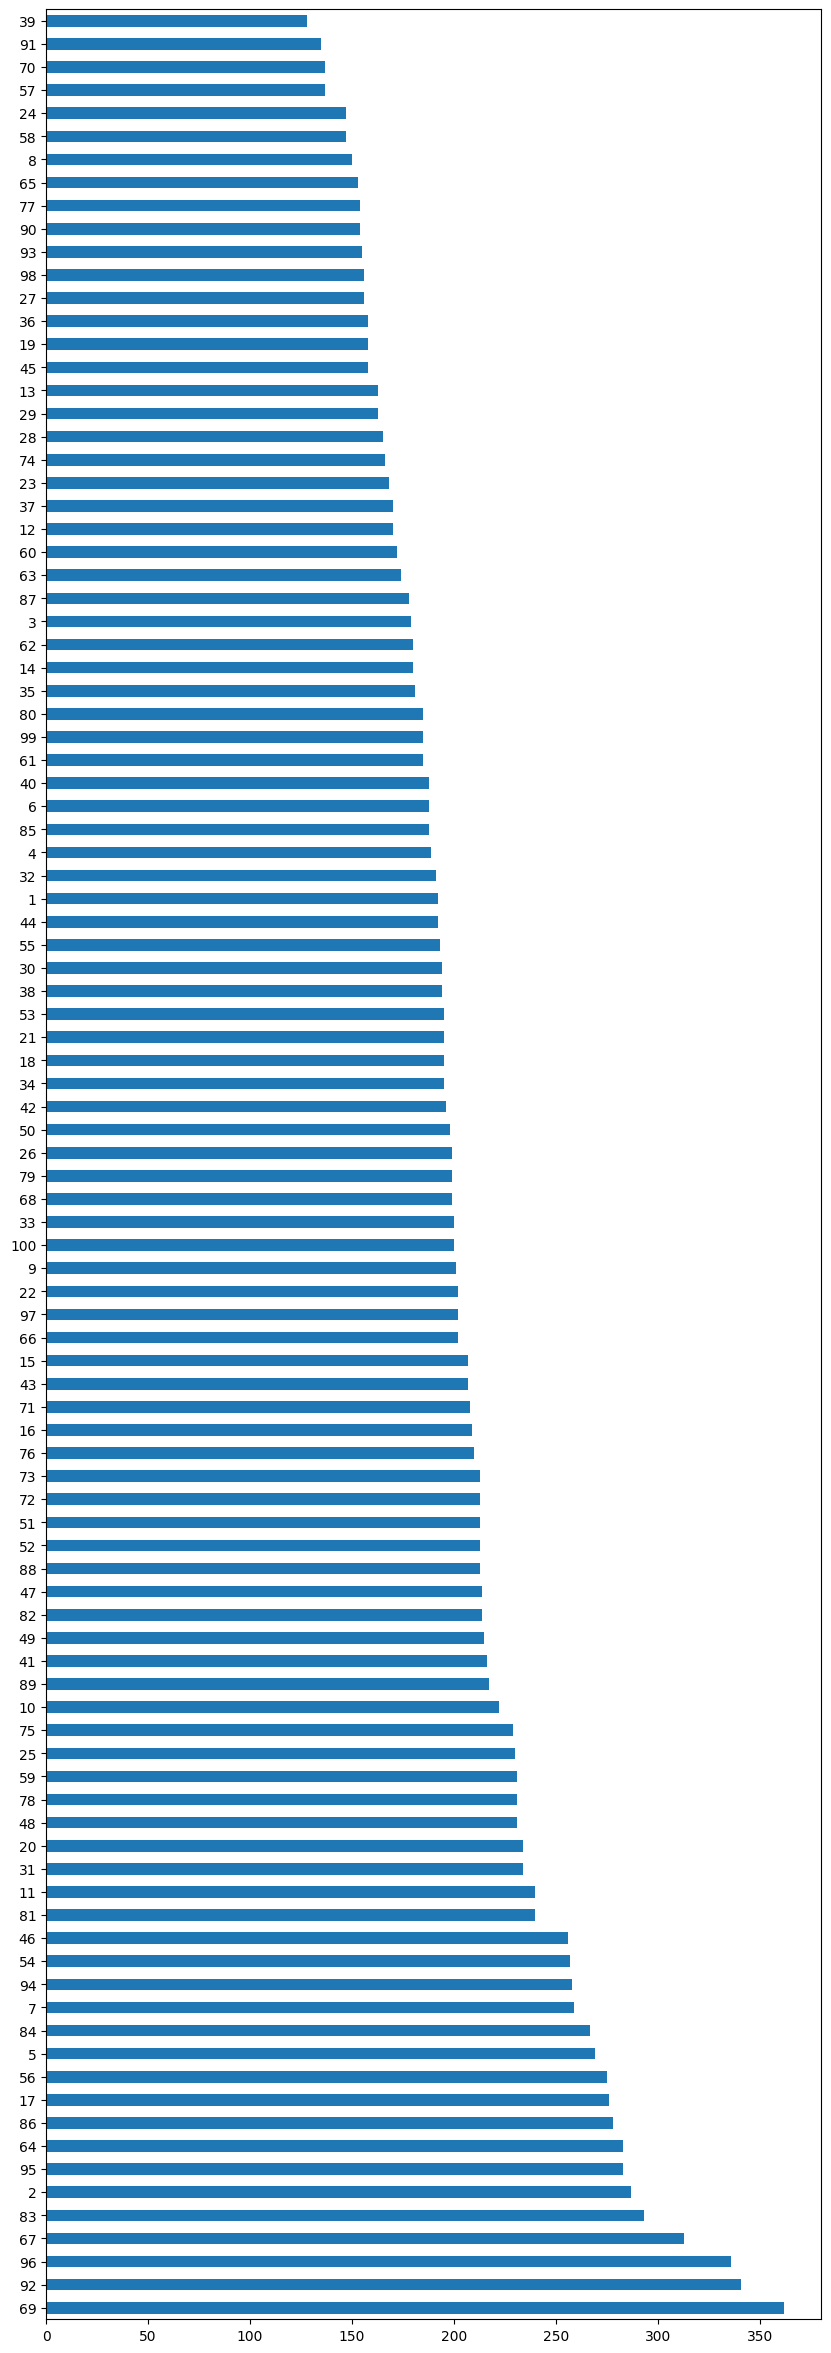

In [68]:
train1['engine'].value_counts().plot(kind='barh', figsize=(10,30))

<AxesSubplot: >

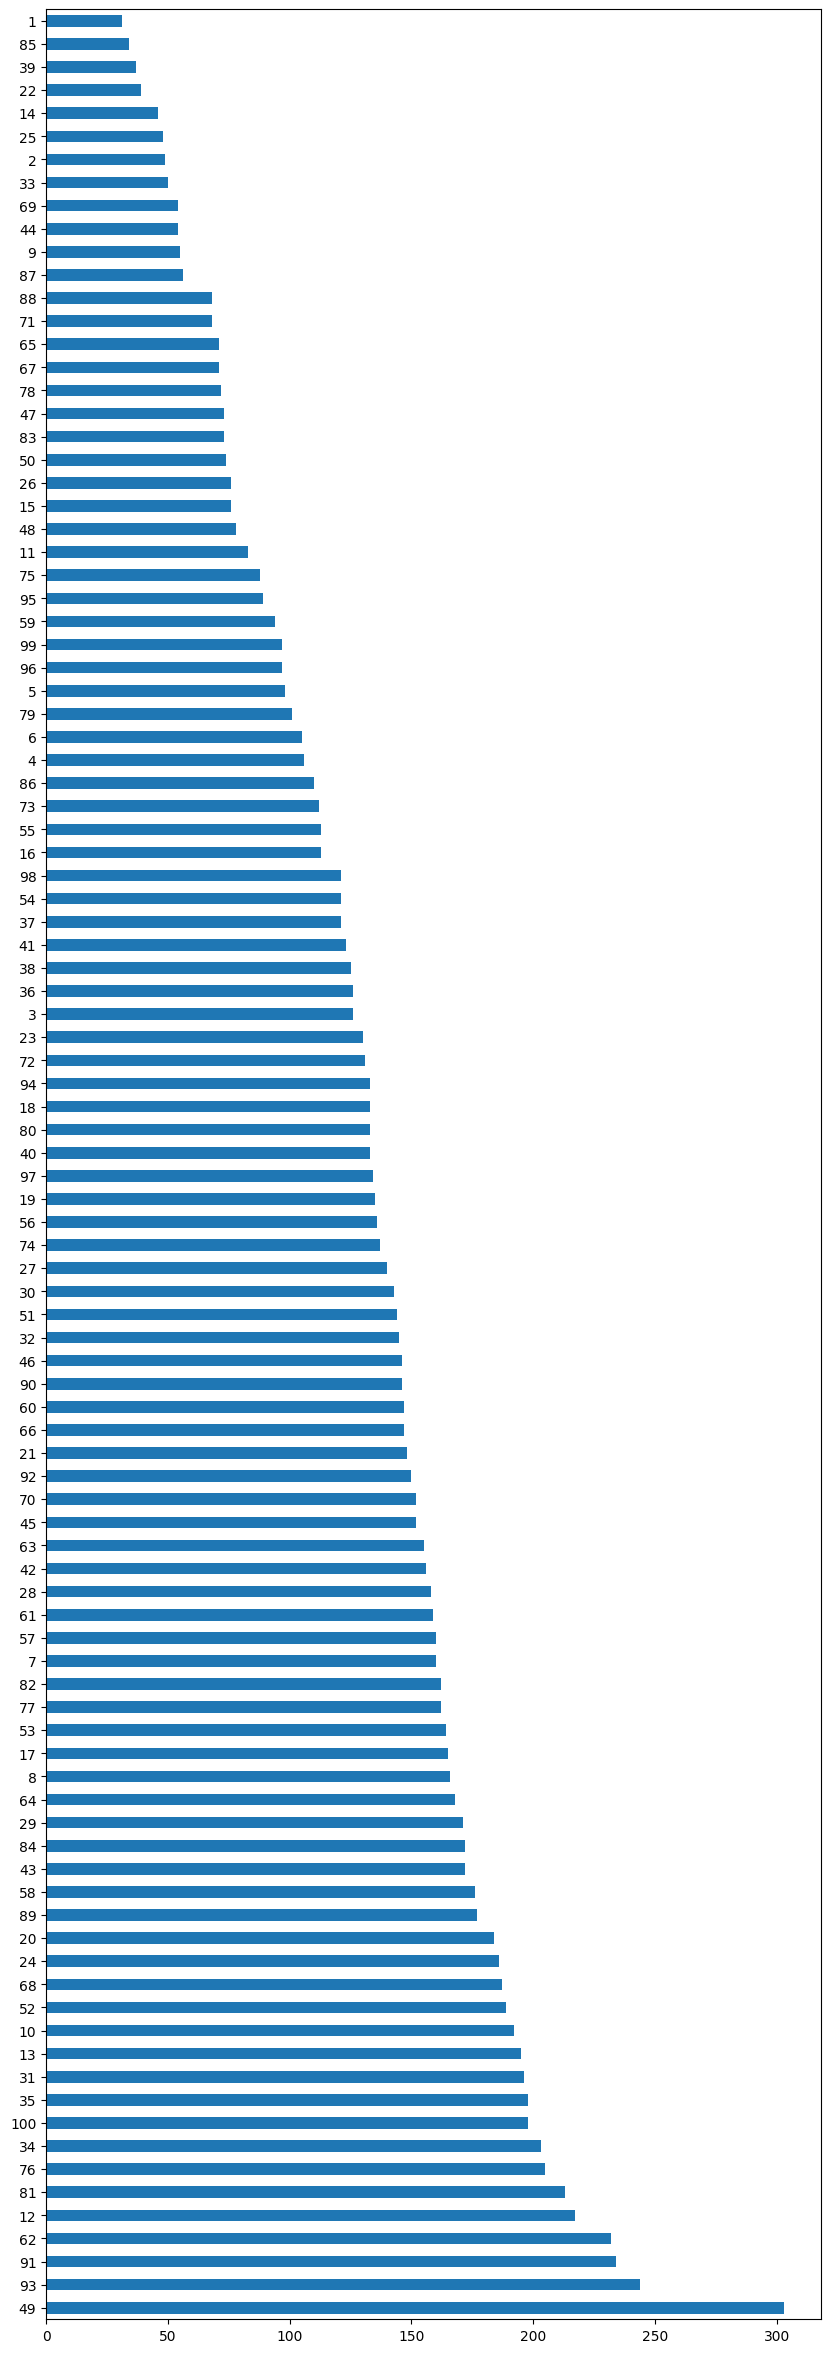

In [69]:
test1['engine'].value_counts().plot(kind = 'barh', figsize = (10,30))

In [70]:
num_engines = list(test1['engine'].unique())
print(num_engines)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [71]:
data = []
for i in np.arange(1, len(num_engines) + 1):
    temp_test_data = test1[test1['engine'] == i].drop(columns = ['max_cycle']).values
    data.append(temp_test_data[-1])

coln = list(test1.columns.drop('max_cycle'))
test1_pre = pd.DataFrame(data, columns = coln)

In [72]:
train1.columns

Index(['engine', 'cycles', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9', 'sm11',
       'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [73]:
test1_pre.columns

Index(['engine', 'cycles', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9', 'sm11',
       'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [74]:
rul1.columns

Index(['engine', 'rul'], dtype='object')

In [75]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(train1.drop(columns = ['engine','cycles','rul']))
y_train = train1['rul']
x_test = scaler.transform(test1_pre.drop(columns = ['engine','cycles','rul']))
y_test = rul1['rul']

In [76]:
rf_model = RandomForestRegressor(n_estimators= 400, max_features = "log2",
                                 n_jobs = -1, random_state = 38)
rf_model.fit(x_train, y_train)
predictions = rf_model.predict(x_test)

In [77]:
print('Train Accuracy:', np.floor(100*(rf_model.score(x_train, y_train))))

r2 = np.floor(100 *(r2_score(y_test, predictions)))
print('Coefficient of determination:', r2)

mse =  mean_squared_error(y_test, predictions)
RMSE = np.ceil(np.sqrt(mse))

print("RMSE: ", RMSE)

Train Accuracy: 95.0
Coefficient of determination: 38.0
RMSE:  33.0


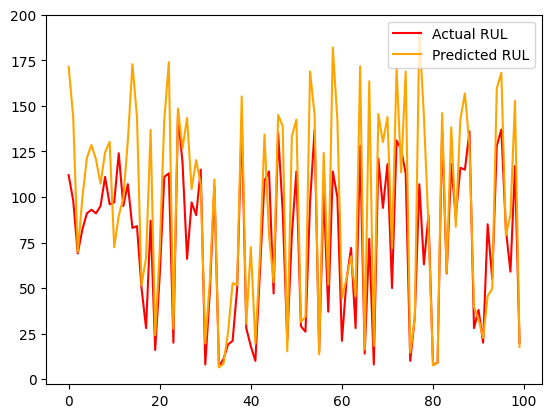

In [78]:
plt.plot(y_test, label = "Actual RUL", color = "red")
plt.plot(predictions, label = "Predicted RUL", color = "orange")
plt.legend()
plt.show()

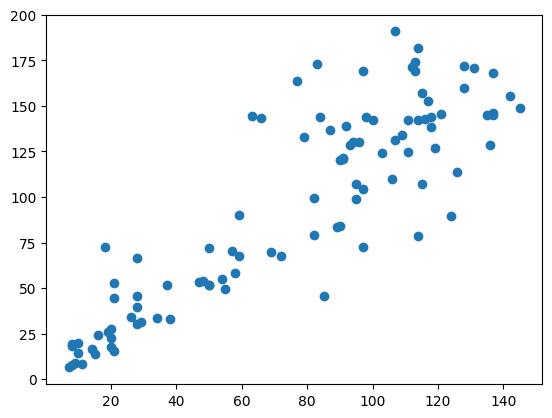

In [79]:
plt.scatter(y_test,predictions)
plt.show()

In [80]:
filename = "fd1.pkl"
pickle.dump(rf_model, open(filename,"wb"))